In [7]:
import pandas as pd
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt

In [8]:
%run data.ipynb
%run ../modules/utils.ipynb
%run ../modules/cds.ipynb
%run ../modules/preprocessing.ipynb

In [9]:
df_217_3p = pd.read_excel('/Users/bryan/Studio/tools/glu_24217_3p_6mG.xlsx')
df_217_5p = pd.read_excel('/Users/bryan/Studio/tools/glu_24217_5p_6mG.xlsx')
df_218_3p = pd.read_excel('/Users/bryan/Studio/tools/glu_24218_3p.xlsx')
df_218_5p = pd.read_excel('/Users/bryan/Studio/tools/glu_24218_5p.xlsx')
df_203_3p = pd.read_excel('/Users/bryan/Studio/tools/glu_24203_3p_6mG.xlsx')
df_203_5p = pd.read_excel('/Users/bryan/Studio/tools/glu_24203_5p_6mG.xlsx')
df_232_3p = pd.read_excel('/Users/bryan/Studio/tools/glu_24232_3p.xlsx')
df_232_5p = pd.read_excel('/Users/bryan/Studio/tools/glu_24232_5p.xlsx')
df_204_3p = pd.read_excel('/Users/bryan/Studio/tools/glu_24204_3p.xlsx')
df_204_5p = pd.read_excel('/Users/bryan/Studio/tools/glu_24204_5p.xlsx')
df_189_3p = pd.read_excel('/Users/bryan/Studio/tools/glu_24189_3p.xlsx')
df_189_5p = pd.read_excel('/Users/bryan/Studio/tools/glu_24189_5p.xlsx')

In [10]:
df_templates_5p = [df_217_5p, df_203_5p, df_204_5p, df_189_5p, df_218_5p, df_232_5p]
df_templates_3p = [df_217_3p, df_203_3p, df_204_3p, df_189_3p, df_218_3p, df_232_3p]

In [11]:
df0_ctrl = load_uc_glu(1)
df0_ctrl_alkb = load_uc_glu(2)
plotly_zone(df0_ctrl)

df1_ctrl = load_uc2(5, intact=True)
df1_ctrl_alkb = load_uc2(6, intact=True)
plotly_zone(df1_ctrl)

In [8]:
df0 = pd.read_excel('/Users/bryan/Documents/Data/UC/UC_glu_5_rosa.xlsx')
df0 = thermo_df(df0)

df1 = load_uc2(17)

df2 = pd.read_excel('/Users/bryan/Documents/ChenLab/10Jun2021/degraded/DrChen_tRNA_A_Glu_FA_17.xlsx')
df2 = thermo_df(df2)

In [19]:
dfm_5ps = list()
dfm_3ps = list()
dfm_3ps_rev = list()
df_sample = df1.copy()
for df_template in df_templates_5p:
    dfm = match_dfs(df_template, df_sample)
    dfm_5ps.append(dfm)

for df_template in df_templates_3p:
    dfm = match_dfs(df_template, df_sample)
    dfm_3ps.append(dfm)
    
    dfm_rev = dfm.copy()
    dfm_rev.Mass = df_template.Mass.max() + H2O - dfm_rev.Mass
    dfm_rev = dfm_rev[dfm_rev.Mass>200]
    dfm_3ps_rev.append(dfm_rev)

0 (25, 5)
1 (25, 5)
2 (11, 5)
3 (24, 5)
4 (9, 5)
5 (7, 5)
6 (7, 5)
7 (7, 5)
(61, 7)


[Text(0, 0, '0'),
 Text(1000, 0, '1000'),
 Text(2000, 0, '2000'),
 Text(3000, 0, '3000'),
 Text(4000, 0, '4000'),
 Text(5000, 0, '5000'),
 Text(6000, 0, '6000'),
 Text(7000, 0, '7000'),
 Text(8000, 0, '8000'),
 Text(9000, 0, '9000'),
 Text(10000, 0, '10000'),
 Text(11000, 0, '11000'),
 Text(12000, 0, '12000'),
 Text(13000, 0, '13000'),
 Text(14000, 0, '14000'),
 Text(15000, 0, '15000'),
 Text(16000, 0, '16000'),
 Text(17000, 0, '17000'),
 Text(18000, 0, '18000'),
 Text(19000, 0, '19000'),
 Text(20000, 0, '20000'),
 Text(21000, 0, '21000'),
 Text(22000, 0, '22000'),
 Text(23000, 0, '23000'),
 Text(24000, 0, '24000')]

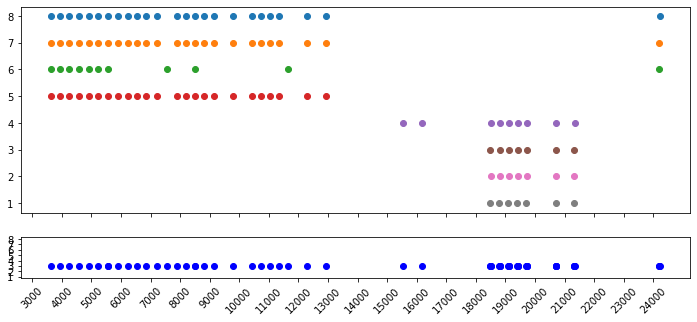

In [20]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 5), 
                               sharex=True, sharey=True, 
                               gridspec_kw={'height_ratios': [5, 1]})

dfs = [
       (dfm_5ps[0], "24160 5'"),
       (dfm_5ps[1], "24159 5'"),
       (dfm_5ps[2], "24174 5'"),
       (dfm_5ps[3], "24175 5'"),
#        (dfm_5ps[4], "23947 5'"),
       
       (dfm_3ps_rev[0], "24160 3' --> 5'"),
       (dfm_3ps_rev[1], "24159 3' --> 5'"),
       (dfm_3ps_rev[2], "24174 3' --> 5'"),
       (dfm_3ps_rev[3], "24175 3' --> 5'"),
#        (dfm_3ps_rev[4], "23947 3' --> 5'"),
      ] 

total = len(dfs)
df_isoforms = list()
for idx, item in enumerate(dfs):
    df_iso = item[0].copy()
    print(idx, df_iso.shape)
    if 'Position' in df_iso.columns:
        df_iso['pos'] = df_iso.Position
    else:
        df_iso['pos'] = df_iso.Mass/320
        df_iso.pos.astype(int)
    label = item[1]
    ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass), label=label)
    
    df_iso['Isoform'] = idx + 1
    df_isoforms.append(df_iso)
# plt.legend(loc=3)
ax1.xaxis.set_ticks(np.arange(0, 25000, 1000))

df_merge_5p = pd.concat(df_isoforms).drop_duplicates(subset=['Mass', 'RT'])
print(df_merge_5p.shape)
ax2.scatter(df_merge_5p.Mass, [3]*df_merge_5p.shape[0], color='b')

ax = plt.gca()
plt.draw()
ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)
# df_merge_5p = pd.concat(df_isoforms)
# output(df_merge_5p, plt, fig, 1, 'phe_complement_5p3p')

# fig.tight_layout()
# plt.savefig('/Users/bryan/Downloads/tRNA_phe_olis2c1_complement.svg', transparent=True, dpi=300)

In [5]:
df_masses = pd.read_excel('~/Downloads/glu_isoforms.xlsx')
df_hm = match_dfs(df_masses, df0_ctrl)
df_hm_alkb = match_dfs(df_masses, df0_ctrl_alkb)
df_hm['Ratio'] = df_hm.Vol / df_hm.Vol.max()
df_hm_alkb['Ratio'] = df_hm_alkb.Vol / df_hm.Vol.max()
df_hm, df_hm_alkb

(            Mass        RT         Vol         RA        FA     Ratio
 32  24232.288354  3.843214  2517215.46   6.860804  1.483939  0.305920
 33  24231.328815  3.979948    24878.14   0.067807  0.014666  0.003023
 34  24218.327801  4.004629    83444.69   0.227433  0.049192  0.010141
 35  24217.314389  3.843214  8228353.75  22.426814  4.850746  1.000000
 37  24204.285779  3.820968    16333.54   0.044518  0.009629  0.001985
 38  24203.310593  3.906337  2606304.72   7.103622  1.536458  0.316747
 40  24189.307523  3.875325   530166.79   1.444998  0.312542  0.064432,
             Mass        RT         Vol         RA        FA     Ratio
 34  24218.258135  3.908830  2150057.99   5.526449  1.271437  0.261299
 35  24217.266231  3.908830     5130.58   0.013187  0.003034  0.000624
 38  24204.280838  3.908830  5130159.03  13.186417  3.033720  0.623473
 39  24203.308301  4.009389    59008.30   0.151673  0.034895  0.007171
 40  24189.292910  3.908830   419119.83   1.077294  0.247847  0.050936)

In [33]:
plotly_zones(df_hm, df_hm_alkb, y='Ratio')

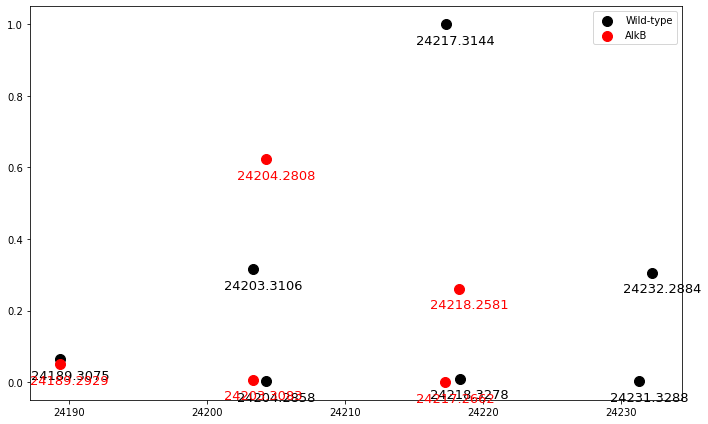

In [6]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(df_hm.Mass, df_hm.Ratio, s=100, color='black', label='Wild-type') ##bdc1c1
plt.scatter(df_hm_alkb.Mass, df_hm_alkb.Ratio, s=100, color='r', label='AlkB') ##d9d9d9

for idx, row in df_hm.iterrows():
        x_pos = row.Mass
        y_pos = row.Ratio
        mass = '{:.4f}'.format(x_pos)
        plt.annotate(text=mass, size=13, xy=(x_pos, y_pos), 
                     textcoords="offset points", xytext=(10, -20), ha='center')

for idx, row in df_hm_alkb.iterrows():
        x_pos = row.Mass
        y_pos = row.Ratio
        mass = '{:.4f}'.format(x_pos)
        plt.annotate(text=mass, size=13, xy=(x_pos, y_pos), 
                     textcoords="offset points", xytext=(10, -20), ha='center', color='r')

plt.legend()

fig.tight_layout()
plt.savefig('/Users/bryan/Downloads/glu_homology_v2.svg', transparent=True, dpi=300)